#Introduction
Insurance charge prediction is a common regression task that helps insurance companies estimate healthcare costs based on individual characteristics.
In this study, we aim to build predictive models using Linear Regression and Random Forest Regression, compare their performance, and identify the most important features affecting insurance charges.

###Dataset Features
- age: Age of the policyholder
- sex: Gender (male/female)
- bmi: Body Mass Index
- children: Number of children/dependents
- smoker: Smoking status (yes/no)
- region: Residential region (northeast, northwest, southeast, southwest)
- charges: Medical insurance charges (target variable)


#Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Loading Dataset

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mirichoi0218/insurance

Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 57.3MB/s]


In [ ]:
!unzip insurance.zip

Archive:  insurance.zip
  inflating: insurance.csv           


In [ ]:
df = pd.read_csv("insurance.csv")
print("Dataset loaded successfully!")

Dataset loaded successfully!


#Dataset Overview

In [ ]:
print("\nShape:", df.shape)


Shape: (1338, 7)


In [ ]:
print("\nFirst five rows:")
print(df.head())


First five rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


#Data Preprocessing

In [ ]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64



Dataset contains 1,338 samples and 7 features.
No missing values were found.

In [ ]:
X = df.drop("charges", axis=1)
y = df["charges"]

In [ ]:
numeric_features = ["age", "bmi", "children"]
categorical_features = ["sex", "smoker", "region"]

In [ ]:
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

categorical_transformer = Pipeline(steps=[("onehot", OneHotEncoder(drop="first"))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

#Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (1070, 6)
Testing set shape: (268, 6)


#Model Building

In [ ]:
lr_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

In [ ]:
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=200, random_state=42))
])

#Model Training and Prediction

In [ ]:
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', LinearRegression())])

In [ ]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

In [ ]:
y_pred_lr = lr_pipeline.predict(X_test)

In [ ]:
y_pred_rf = rf_pipeline.predict(X_test)

#Model Evaluation

In [ ]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

In [ ]:
lr_results = evaluate_model(y_test, y_pred_lr)

In [ ]:
rf_results = evaluate_model(y_test, y_pred_rf)

In [ ]:
results_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [lr_results[0], rf_results[0]],
    "MSE": [lr_results[1], rf_results[1]],
    "RMSE": [lr_results[2], rf_results[2]],
    "R²": [lr_results[3], rf_results[3]]
})

In [ ]:
print("\nModel Evaluation Results:")
print(results_df)


Model Evaluation Results:
               Model          MAE           MSE         RMSE        R²
0  Linear Regression  4181.194474  3.359692e+07  5796.284659  0.783593
1      Random Forest  2555.745670  2.096929e+07  4579.223657  0.864931


###5-Fold Cross-Validation

In [ ]:
cv_lr = cross_val_score(lr_pipeline, X, y, cv=5, scoring="r2")

In [ ]:
cv_rf = cross_val_score(rf_pipeline, X, y, cv=5, scoring="r2")

In [ ]:
print("\n5-Fold Cross-Validation R²:")
print(f"Linear Regression Mean R²: {cv_lr.mean():.3f}")
print(f"Random Forest Mean R²: {cv_rf.mean():.3f}")


5-Fold Cross-Validation R²:
Linear Regression Mean R²: 0.747
Random Forest Mean R²: 0.837


#Visualization

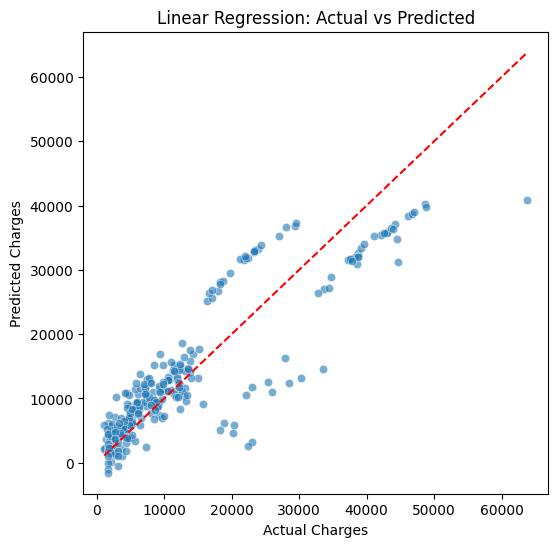

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()

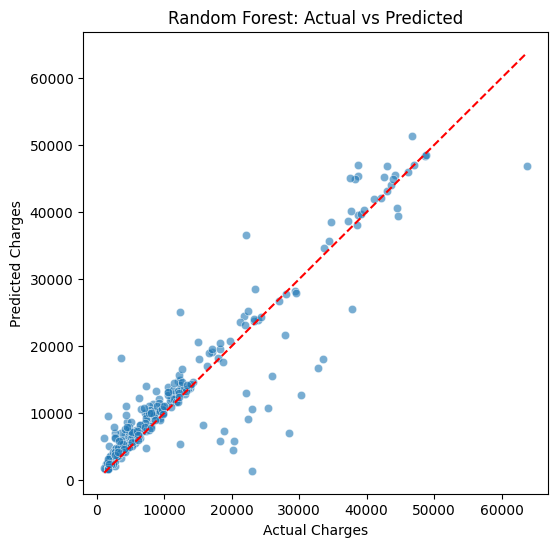

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Random Forest: Actual vs Predicted")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()

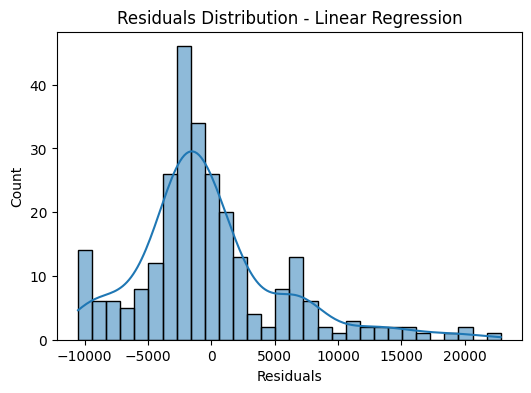

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(y_test - y_pred_lr, bins=30, kde=True)
plt.title("Residuals Distribution - Linear Regression")
plt.xlabel("Residuals")
plt.show()

#Feature Importance (Random Forest)

In [ ]:
ohe = rf_pipeline.named_steps["preprocessor"].named_transformers_["cat"].named_steps["onehot"]
cat_feature_names = ohe.get_feature_names_out(categorical_features)
all_features = numeric_features + list(cat_feature_names)
importances = rf_pipeline.named_steps["regressor"].feature_importances_

In [ ]:
feat_imp = pd.DataFrame({
    "Feature": all_features,
    "Importance": importances
}).sort_values("Importance", ascending=False)

In [ ]:
print("\nRandom Forest Feature Importances:")
print(feat_imp)


Random Forest Feature Importances:
            Feature  Importance
4        smoker_yes    0.609377
1               bmi    0.214840
0               age    0.134682
2          children    0.019561
3          sex_male    0.006308
5  region_northwest    0.005733
6  region_southeast    0.005417
7  region_southwest    0.004081


#Model Comparison and Justification

In [ ]:
print("\n Final Model Justification ")
if results_df.loc[0, "R²"] > results_df.loc[1, "R²"]:
    print("Linear Regression performed better overall.")
    print("Reason: The data relationships are mostly linear, so Linear Regression captured them effectively.")
else:
    print("Random Forest performed better overall.")
    print("Reason: Random Forest handled nonlinear interactions more effectively.")



 Final Model Justification 
Random Forest performed better overall.
Reason: Random Forest handled nonlinear interactions more effectively.


#Conclusion
- Both models provide good predictions, but Random Forest is superior in this dataset.
- The most influential features are smoking status and BMI.
- Future improvements could include adding more features such as income, lifestyle habits, or hyperparameter tuning.
